In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def signal_fn(t,A,w,phi):
  return A*np.sin((w*t)+phi)

def noise_fn(std,n):
  return np.random.normal(0,std,n)

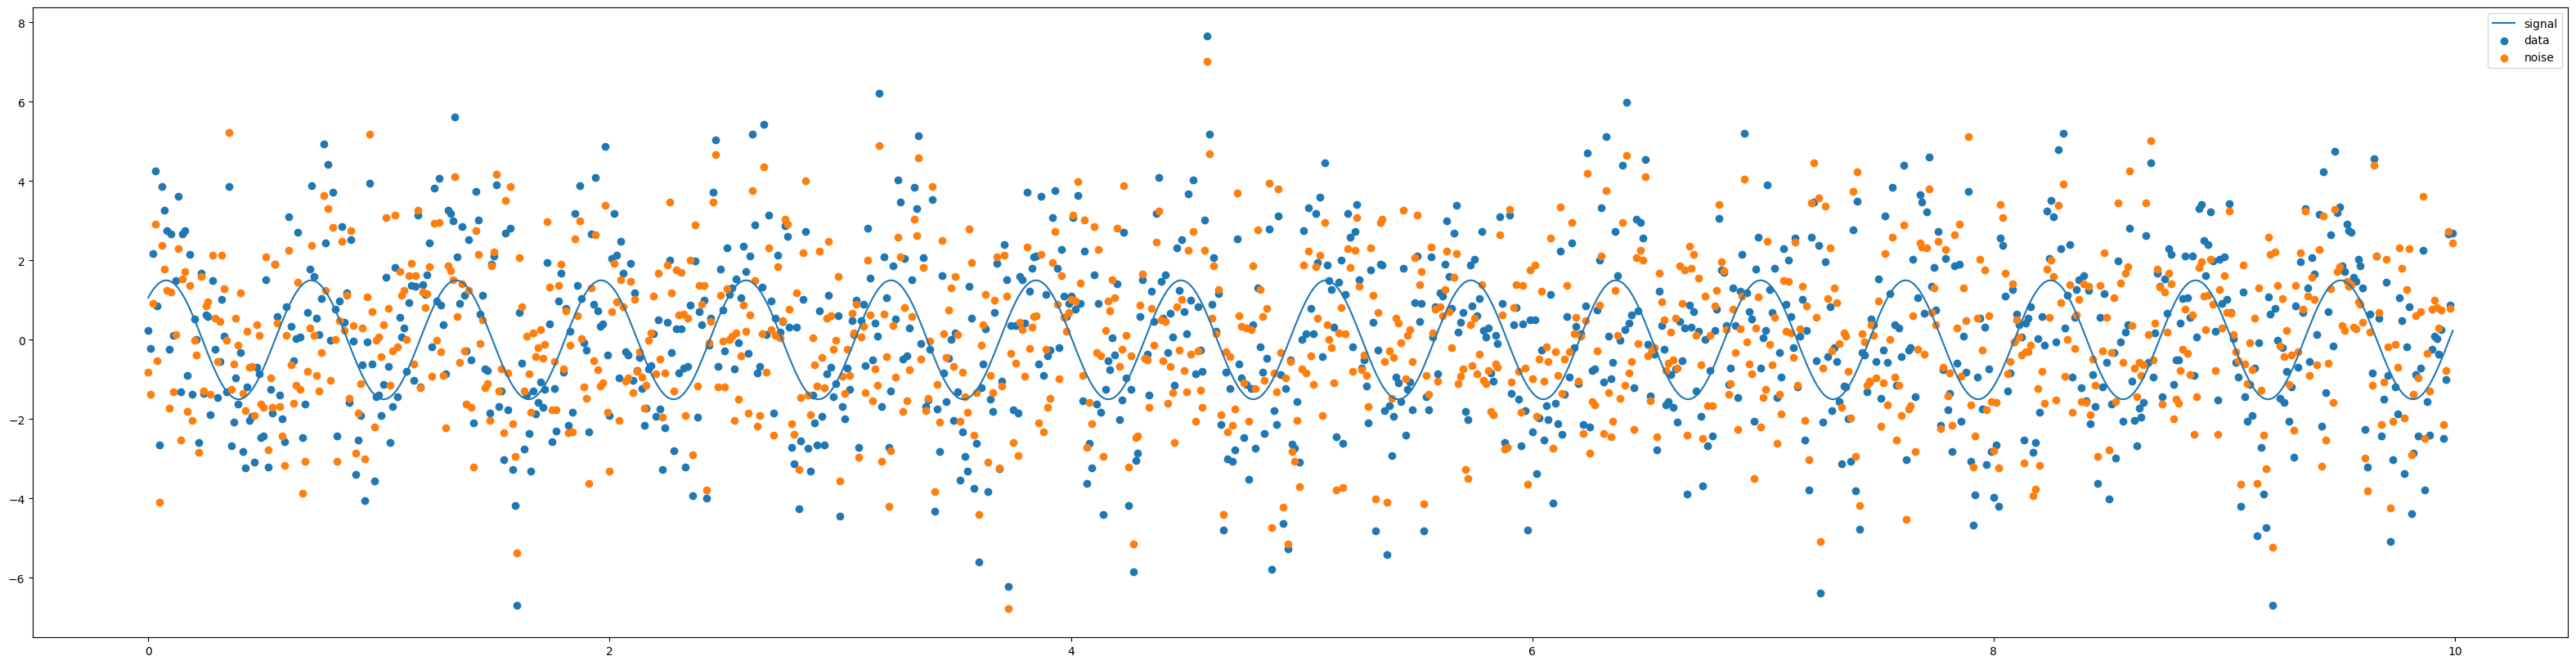

In [3]:
t = np.arange(0,10,0.01)

true_A = 1.5
true_w = 10
true_phi = np.pi/4
std = 2

sig = signal_fn(t,true_A,true_w,true_phi)
noise = noise_fn(std,len(t))
data = sig + noise

plt.figure(figsize=(40, 10))
plt.plot(t,sig,label='signal')
plt.scatter(t,data,label='data')
plt.scatter(t,noise,label='noise')
plt.legend(loc='best')

[[10.415142556805876, -2416.8645744883675],
 [10.460589408265472, -2415.935597104346],
 [10.478152654179393, -2412.1950913136257],
 [10.48803643056966, -2409.3670752529233],
 [10.377974031250027, -2407.136767003891],
 [10.364293885341553, -2401.067694668846],
 [11.775430301909907, -2396.0603742503754],
 [11.778322579085229, -2395.9416105160444],
 [11.747244176997173, -2395.7742784528054],
 [10.524780572354715, -2395.049520420745],
 [11.794279155593582, -2394.8134007429853],
 [11.731674853815404, -2394.4698769358506],
 [11.801734238648098, -2394.0224435190376],
 [11.804680385359662, -2393.665711897988],
 [10.346067474344292, -2390.9127603707334],
 [10.344361128632274, -2389.842812385037],
 [8.945421325450202, -2389.6513281507123],
 [8.94831409448795, -2389.6164270575214],
 [8.956654841706179, -2389.3745918906397],
 [11.699364324433805, -2389.1961971586215],
 [11.846051163902349, -2386.3413256426725],
 [10.544478510994173, -2385.490069873027],
 [10.329279995732863, -2379.5200343525935],


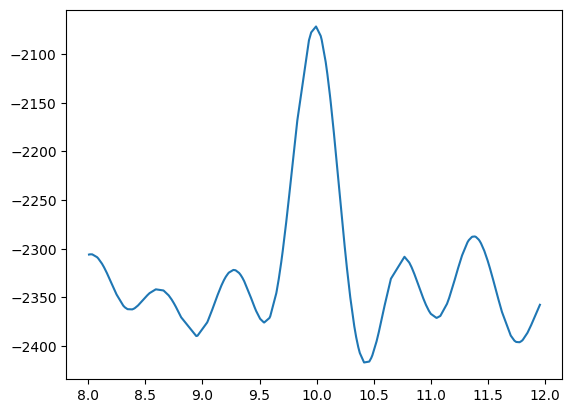

In [4]:
def ln_likelihood(t,true_A,w,true_phi,std,data):
  signal_data = signal_fn(t,true_A,w,true_phi)
  ln_likes = -0.5 * ((data - signal_data)**2 / std**2 + np.log(2*np.pi*std**2))
  return sum(ln_likes)


def get_prior_w(w_range,n):
  return np.random.uniform(w_range[0],w_range[1],n)

w_range = [8,12]
w_iter = get_prior_w(w_range,200)

w_and_likes = []

for i in w_iter:
  w_and_likes.append([i,ln_likelihood(t,true_A,i,true_phi,std,data)])

sorted_w_and_likes = sorted(w_and_likes,key=lambda x: x[0])
x=[x[0] for x in sorted_w_and_likes]
y=[x[1] for x in sorted_w_and_likes]
plt.plot(x,y)

sorted_w_and_likes = sorted(w_and_likes,key=lambda x: x[1])
sorted_w_and_likes

In [5]:
N_iter = 4000
i=0

w_Nsample=[]

while(i<N_iter):
  w_sample = get_prior_w(w_range,1)
  ln_likes_sample = ln_likelihood(t,true_A,w_sample,true_phi,std,data)

  if ln_likes_sample > sorted_w_and_likes[0][1]:
    w_Nsample.append(sorted_w_and_likes.pop(0))
    sorted_w_and_likes.append([w_sample[0],ln_likes_sample])
    sorted_w_and_likes = sorted(sorted_w_and_likes,key=lambda x: x[1])

  i+=1

w_Nsample = sorted(w_Nsample,key=lambda x: x[1])
w_Nsample
# x=[x[0] for x in w_Nsample]
# y=[x[1] for x in w_Nsample]
# plt.plot(x,y)

[[10.415142556805876, -2416.8645744883675],
 [10.460589408265472, -2415.935597104346],
 [10.478152654179393, -2412.1950913136257],
 [10.48803643056966, -2409.3670752529233],
 [10.377974031250027, -2407.136767003891],
 [10.364293885341553, -2401.067694668846],
 [11.775430301909907, -2396.0603742503754],
 [11.778322579085229, -2395.9416105160444],
 [11.747244176997173, -2395.7742784528054],
 [10.524780572354715, -2395.049520420745],
 [11.794279155593582, -2394.8134007429853],
 [11.731674853815404, -2394.4698769358506],
 [11.801734238648098, -2394.0224435190376],
 [11.804680385359662, -2393.665711897988],
 [10.346067474344292, -2390.9127603707334],
 [10.344361128632274, -2389.842812385037],
 [8.945421325450202, -2389.6513281507123],
 [8.94831409448795, -2389.6164270575214],
 [8.956654841706179, -2389.3745918906397],
 [11.699364324433805, -2389.1961971586215],
 [11.83878347221033, -2387.9053339167494],
 [11.846051163902349, -2386.3413256426725],
 [10.544478510994173, -2385.490069873027],
 